### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv("~/Downloads/fraudTest.csv")
dataset.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Univariate Analysis

In [4]:
num = ['amt', 'zip', 'lat', 'long', 'city_pop','merch_lat', 'merch_long']
obj = ['category','gender', 'state']

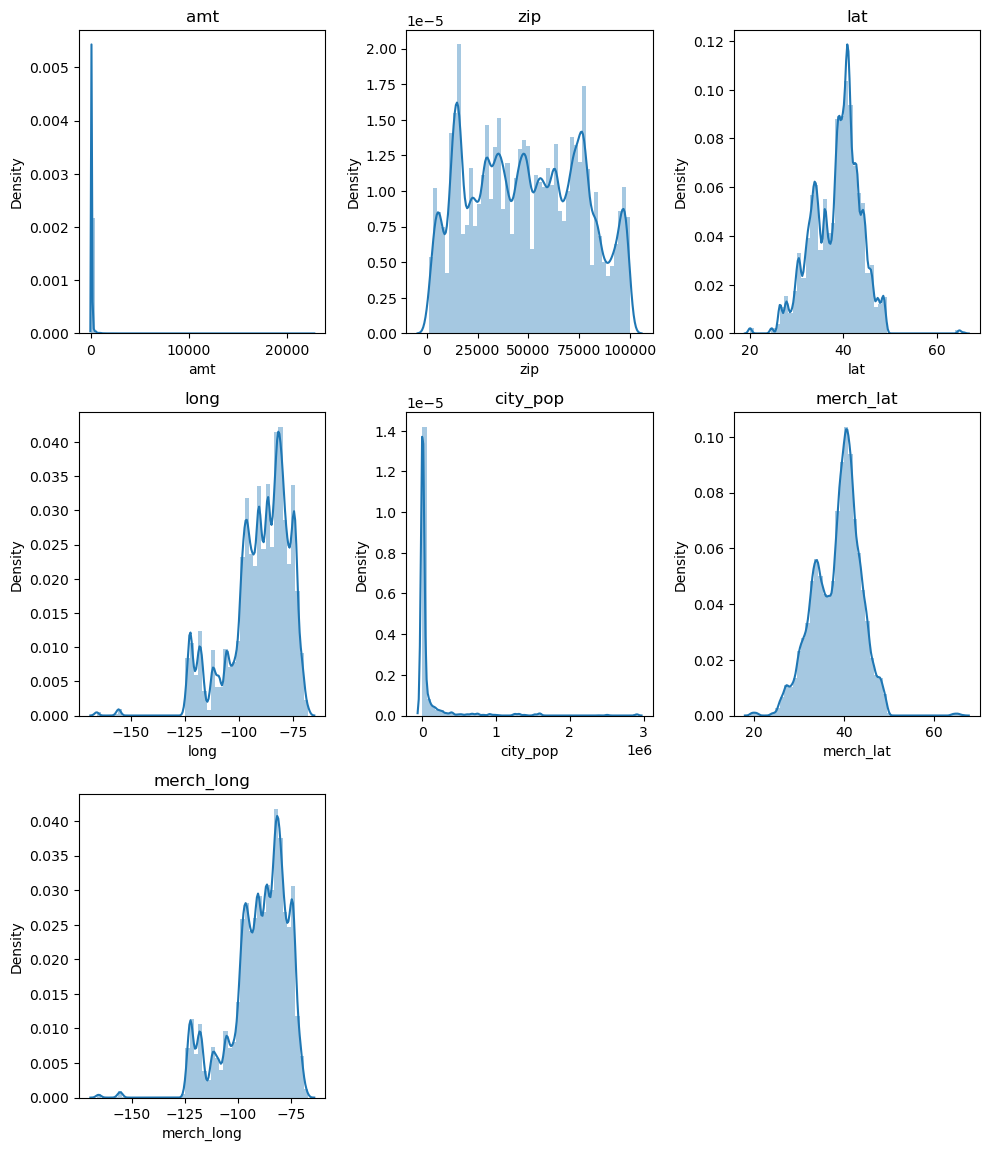

In [5]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.distplot(dataset.loc[:,i])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

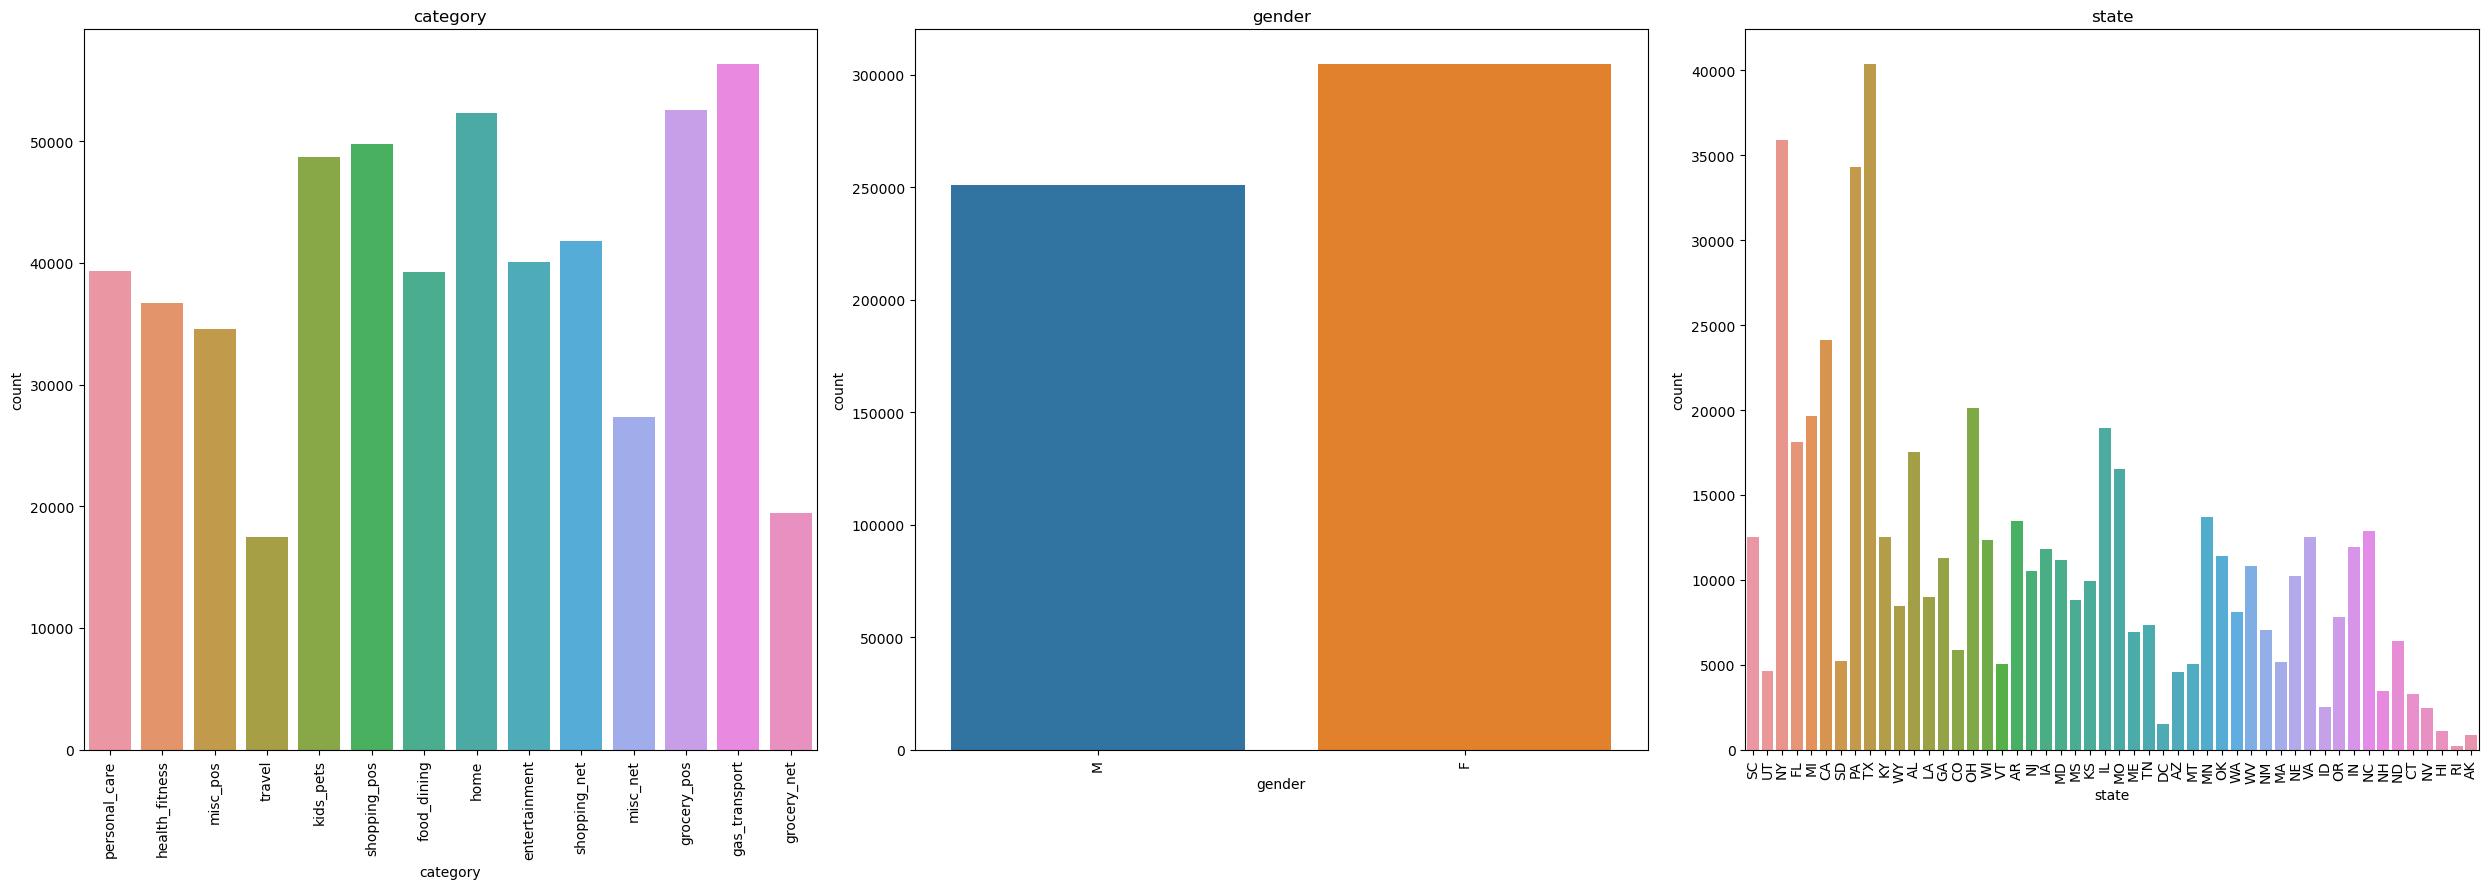

In [6]:
plt.rcParams['figure.figsize']=[25,25]
row=3
column=3
iterator=1

for i in obj:
    plt.subplot(row,column,iterator)
    sns.countplot(dataset.loc[:,i])
    iterator=1+iterator
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate Analysis

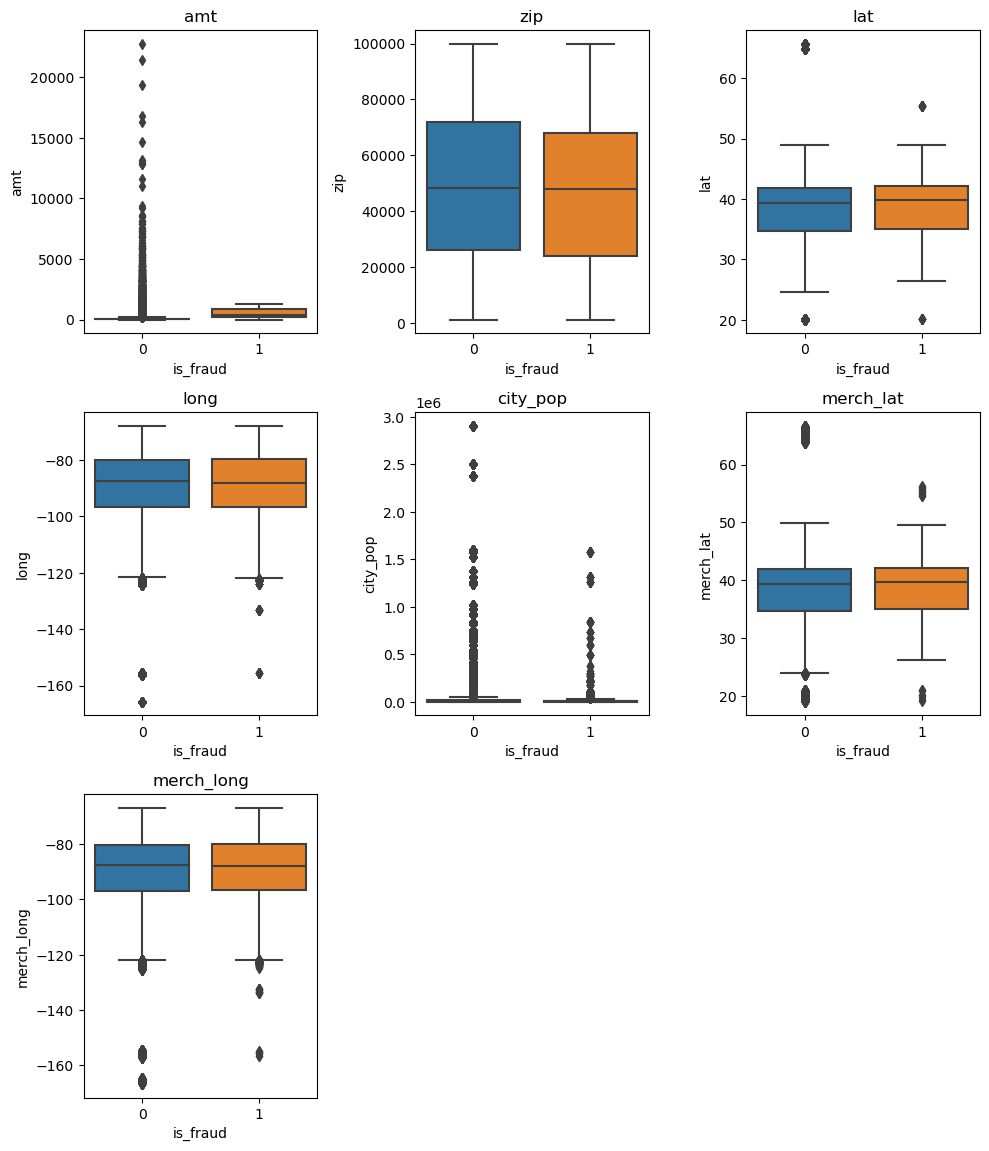

In [7]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.boxplot(y=dataset.loc[:,i],x=dataset.loc[:,'is_fraud'])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

## Outliers Treatment

In [8]:
for i in num:
    
    q1=dataset[i].quantile(0.25)
    q3=dataset[i].quantile(0.75)
    iqr=q3-q1

    upper_lim=q3+1.5*iqr
    lower_lim=q1-1.5*iqr
    dataset.loc[dataset[i]>upper_lim,i]=upper_lim
    dataset.loc[dataset[i]<lower_lim,i]=lower_lim

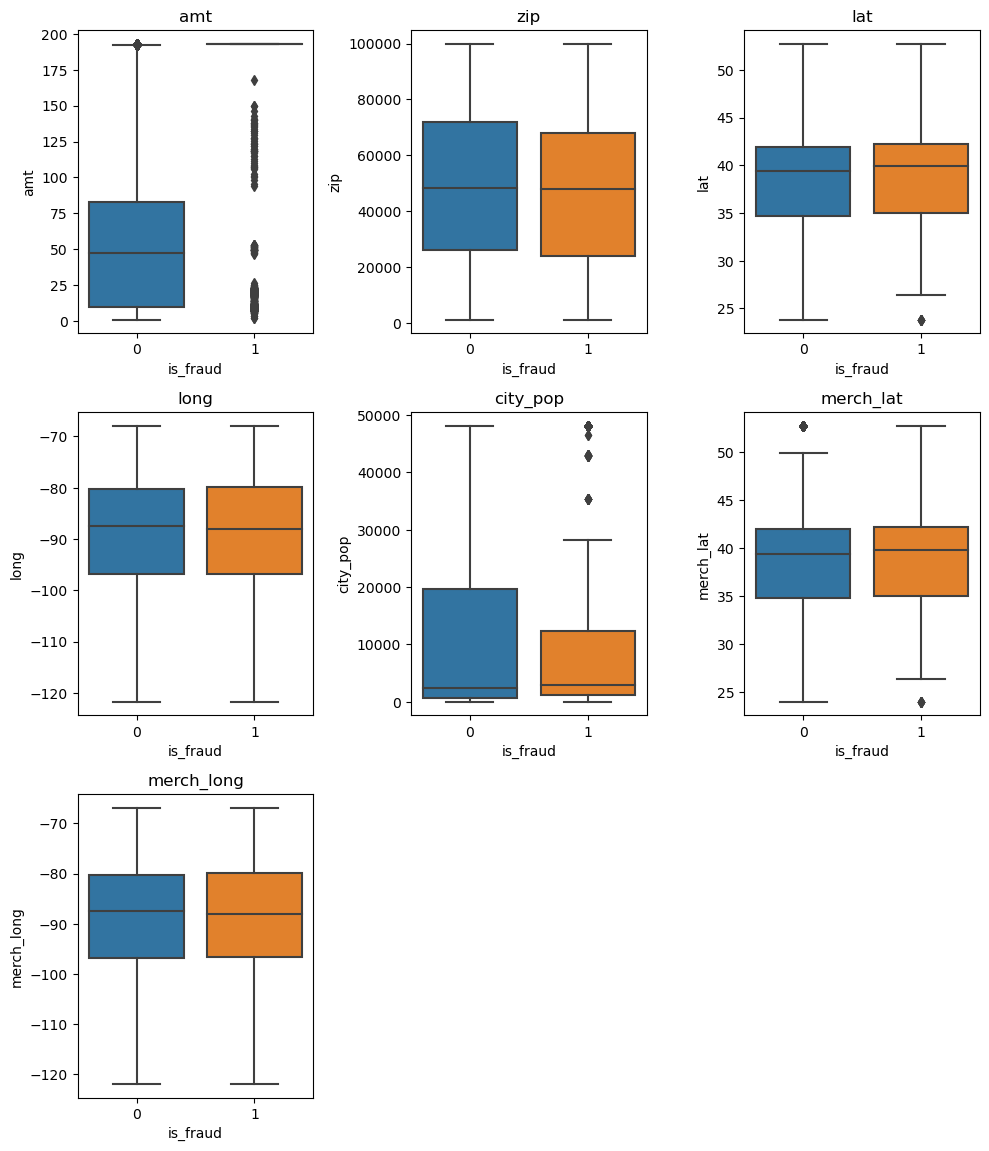

In [9]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.boxplot(y=dataset.loc[:,i],x=dataset.loc[:,'is_fraud'])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

# imbalance in data

In [10]:
fraud = dataset[dataset['is_fraud'] == 1]
valid = dataset[dataset['is_fraud'] == 0]

In [11]:
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.003874820710510248


In [12]:
print('Fraud Cases: {}'.format(len(dataset[dataset['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['is_fraud'] == 0])))

Fraud Cases: 2145
Valid Transactions: 553574


In [13]:
dataset.amt.describe()

count    555719.000000
mean         57.607360
std          52.833274
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max         193.080000
Name: amt, dtype: float64

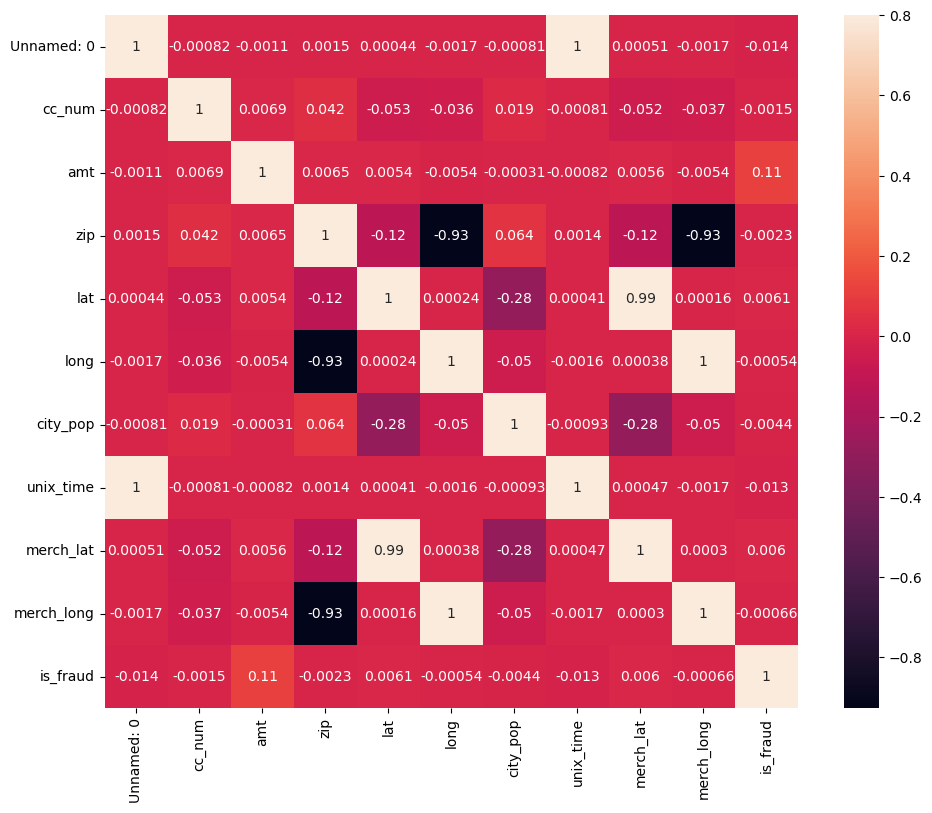

In [14]:
plt.figure(figsize = (12, 9))
sns.heatmap(dataset.corr(), vmax = .8, square = True,annot=True)
plt.show()

We will select important columns for our study

In [15]:
princ_col = ['category', 'amt', 'gender', 'city', 'city_pop', 'dob', 'is_fraud']
data = dataset[princ_col]
data.head()

category    amt gender        city  city_pop         dob  is_fraud
0   personal_care   2.86      M    Columbia     48101  1968-03-19         0
1   personal_care  29.84      F     Altonah       302  1990-01-17         0
2  health_fitness  41.28      F    Bellmore     34496  1970-10-21         0
3        misc_pos  60.05      M  Titusville     48101  1987-07-25         0
4          travel   3.19      M    Falmouth      1126  1955-07-06         0

We want only the year of birth in dob column.

In [16]:
year = []
for i in range(len(data)):
    year.append(str(data['dob'][i]).split('-')[0])
    
# drop column dob
data = data.drop(['dob'], axis=1)
data.insert(5, "Byear", year, True)

# change type of columns
data['Byear'] = data['Byear'].astype('int')
data['amt'] = data['amt'].astype('float')
data.head()

category    amt gender        city  city_pop  Byear  is_fraud
0   personal_care   2.86      M    Columbia     48101   1968         0
1   personal_care  29.84      F     Altonah       302   1990         0
2  health_fitness  41.28      F    Bellmore     34496   1970         0
3        misc_pos  60.05      M  Titusville     48101   1987         0
4          travel   3.19      M    Falmouth      1126   1955         0

In [17]:
data.dtypes

category     object
amt         float64
gender       object
city         object
city_pop      int64
Byear         int32
is_fraud      int64
dtype: object

In [18]:
# Select columns for a training later
X = data.iloc[:, 0:6].values
y = data.iloc[:, -1].values
print("X Data\n",X)
print("\ny Data\n",y)

X Data
 [['personal_care' 2.86 'M' 'Columbia' 48101 1968]
 ['personal_care' 29.84 'F' 'Altonah' 302 1990]
 ['health_fitness' 41.28 'F' 'Bellmore' 34496 1970]
 ...
 ['kids_pets' 86.88 'F' 'Burbank' 3684 1981]
 ['travel' 7.99 'M' 'Mesa' 129 1965]
 ['entertainment' 38.13 'M' 'Edmond' 48101 1993]]

y Data
 [0 0 0 ... 0 0 0]


### Encoding Categorical data

Label Encoding the "Gender" column:
- Female = 0
- Male = 1

In [19]:
# Gender
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2]) # Column 3 (Gender)
X

array([['personal_care', 2.86, 1, 'Columbia', 48101, 1968],
       ['personal_care', 29.84, 0, 'Altonah', 302, 1990],
       ['health_fitness', 41.28, 0, 'Bellmore', 34496, 1970],
       ...,
       ['kids_pets', 86.88, 0, 'Burbank', 3684, 1981],
       ['travel', 7.99, 1, 'Mesa', 129, 1965],
       ['entertainment', 38.13, 1, 'Edmond', 48101, 1993]], dtype=object)

Label Encoding the "Cities" column:

In [20]:
# Cities
X[:, 3] = le.fit_transform(X[:, 3]) # Column 4 (City)
X

array([['personal_care', 2.86, 1, 157, 48101, 1968],
       ['personal_care', 29.84, 0, 16, 302, 1990],
       ['health_fitness', 41.28, 0, 61, 34496, 1970],
       ...,
       ['kids_pets', 86.88, 0, 104, 3684, 1981],
       ['travel', 7.99, 1, 476, 129, 1965],
       ['entertainment', 38.13, 1, 224, 48101, 1993]], dtype=object)

One Hot Encoding the "Category" column

In [21]:
ctCategory = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ctCategory.fit_transform(X))
X

array([[0.0, 0.0, 0.0, ..., 157, 48101, 1968],
       [0.0, 0.0, 0.0, ..., 16, 302, 1990],
       [0.0, 0.0, 0.0, ..., 61, 34496, 1970],
       ...,
       [0.0, 0.0, 0.0, ..., 104, 3684, 1981],
       [0.0, 0.0, 0.0, ..., 476, 129, 1965],
       [1.0, 0.0, 0.0, ..., 224, 48101, 1993]], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [23]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)

In [24]:
from imblearn.over_sampling import SMOTE 

In [25]:
over_samp = SMOTE()

In [26]:
x_train_os,y_train_os = over_samp.fit_resample(x_train,y_train)

In [27]:
import statsmodels.api as sma
sma.add_constant(X)

array([[1.0, 0.0, 0.0, ..., 157, 48101, 1968],
       [1.0, 0.0, 0.0, ..., 16, 302, 1990],
       [1.0, 0.0, 0.0, ..., 61, 34496, 1970],
       ...,
       [1.0, 0.0, 0.0, ..., 104, 3684, 1981],
       [1.0, 0.0, 0.0, ..., 476, 129, 1965],
       [1.0, 1.0, 0.0, ..., 224, 48101, 1993]], dtype=object)

# Making the predictions and evaluating the model

### Predicting the result of a single observation
Using our ANN model to predict if the customer with the following informations will leave the bank: 

- category: health_fitness (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
- amt: 20.00 
- Gender: F (0)
- City: Columbia (157)
- Byear: 30 (1992)

**So, is this customer a frauder?**

### X[0]

## Making the Confusion Matrix
Result:

  [ Correct predictions Stay / Incorrect predictions Leave ]

  [ Incorrect predictions Stay / Correct predictions Leave ]

- Hit percentage of results

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logmodel = sma.Logit(y_train_os, x_train_os).fit()
logmodel.summary()

Optimization terminated successfully.
         Current function value: 0.459404
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               885742
Model:                          Logit   Df Residuals:                   885723
Method:                           MLE   Df Model:                           18
Date:                Tue, 27 Dec 2022   Pseudo R-squ.:                  0.3372
Time:                        20:41:15   Log-Likelihood:            -4.0691e+05
converged:                       True   LL-Null:                   -6.1395e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4187      0.014   -168.184      0.000      -2.447      -2.390
x2            -1.7644      0.013   -131.741      0.000      -1.791      -1.738
x3            -0.1925      0.008    -22.923      0.000      -0.209      -0.176
x4            -0.3242      0.015    -22.026      0.000      -0.353      -0.295
x5            -1.5157      0.010   -159.307      0.000      -1.534      -1.497
x6            -0.9557      0.013    -75.017      0.000      -0.981      -0.931
x7            -2.4560      0.013   -185.839      0.000      -2.482      -2.430
x8            -1.1722      0.012   -100.626      0.000      -1.195      -1.149
x9            -0.9506      0.012    -76.543      0.000      -0.975      -0.926
x10           -0.5935      0.013    -46.305      0.000      -0.619      -0.568
x11           -0.5594      0.011    -49.985      0.000      -0.581      -0.537
x12           -0.6776      0.010    -65.747      0.000      -0.698      -0.657
x13           -1.4992      0.011   -132.361      0.000      -1.521      -1.477
x14            0.2990      0.015     19.846      0.000       0.270       0.329
x15            1.5909      0.004    413.737      0.000       1.583       1.598
x16           -0.2206      0.006    -38.691      0.000      -0.232      -0.209
x17            0.0684      0.005     14.240      0.000       0.059       0.078
x18           -0.1292      0.003    -42.380      0.000      -0.135      -0.123
x19           -0.1032      0.004    -25.021      0.000      -0.111      -0.095
==============================================================================
"""

In [29]:
y_pred_prob = logmodel.predict(x_test)
y_pred=[ 0 if x < 0.50 else 1 for x in y_pred_prob]

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[88801 21902]
 [  121   320]]


0.8018516519110344

In [32]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    110703
           1       0.01      0.73      0.03       441

    accuracy                           0.80    111144
   macro avg       0.51      0.76      0.46    111144
weighted avg       0.99      0.80      0.89    111144



In [33]:
print(x_train_os.shape,y_train_os.shape,x_test.shape,y_test.shape)

(885742, 19) (885742,) (111144, 19) (111144,)


## Decision Tree 

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',random_state=46)
decisiontree=dtc.fit(x_train_os,y_train_os)

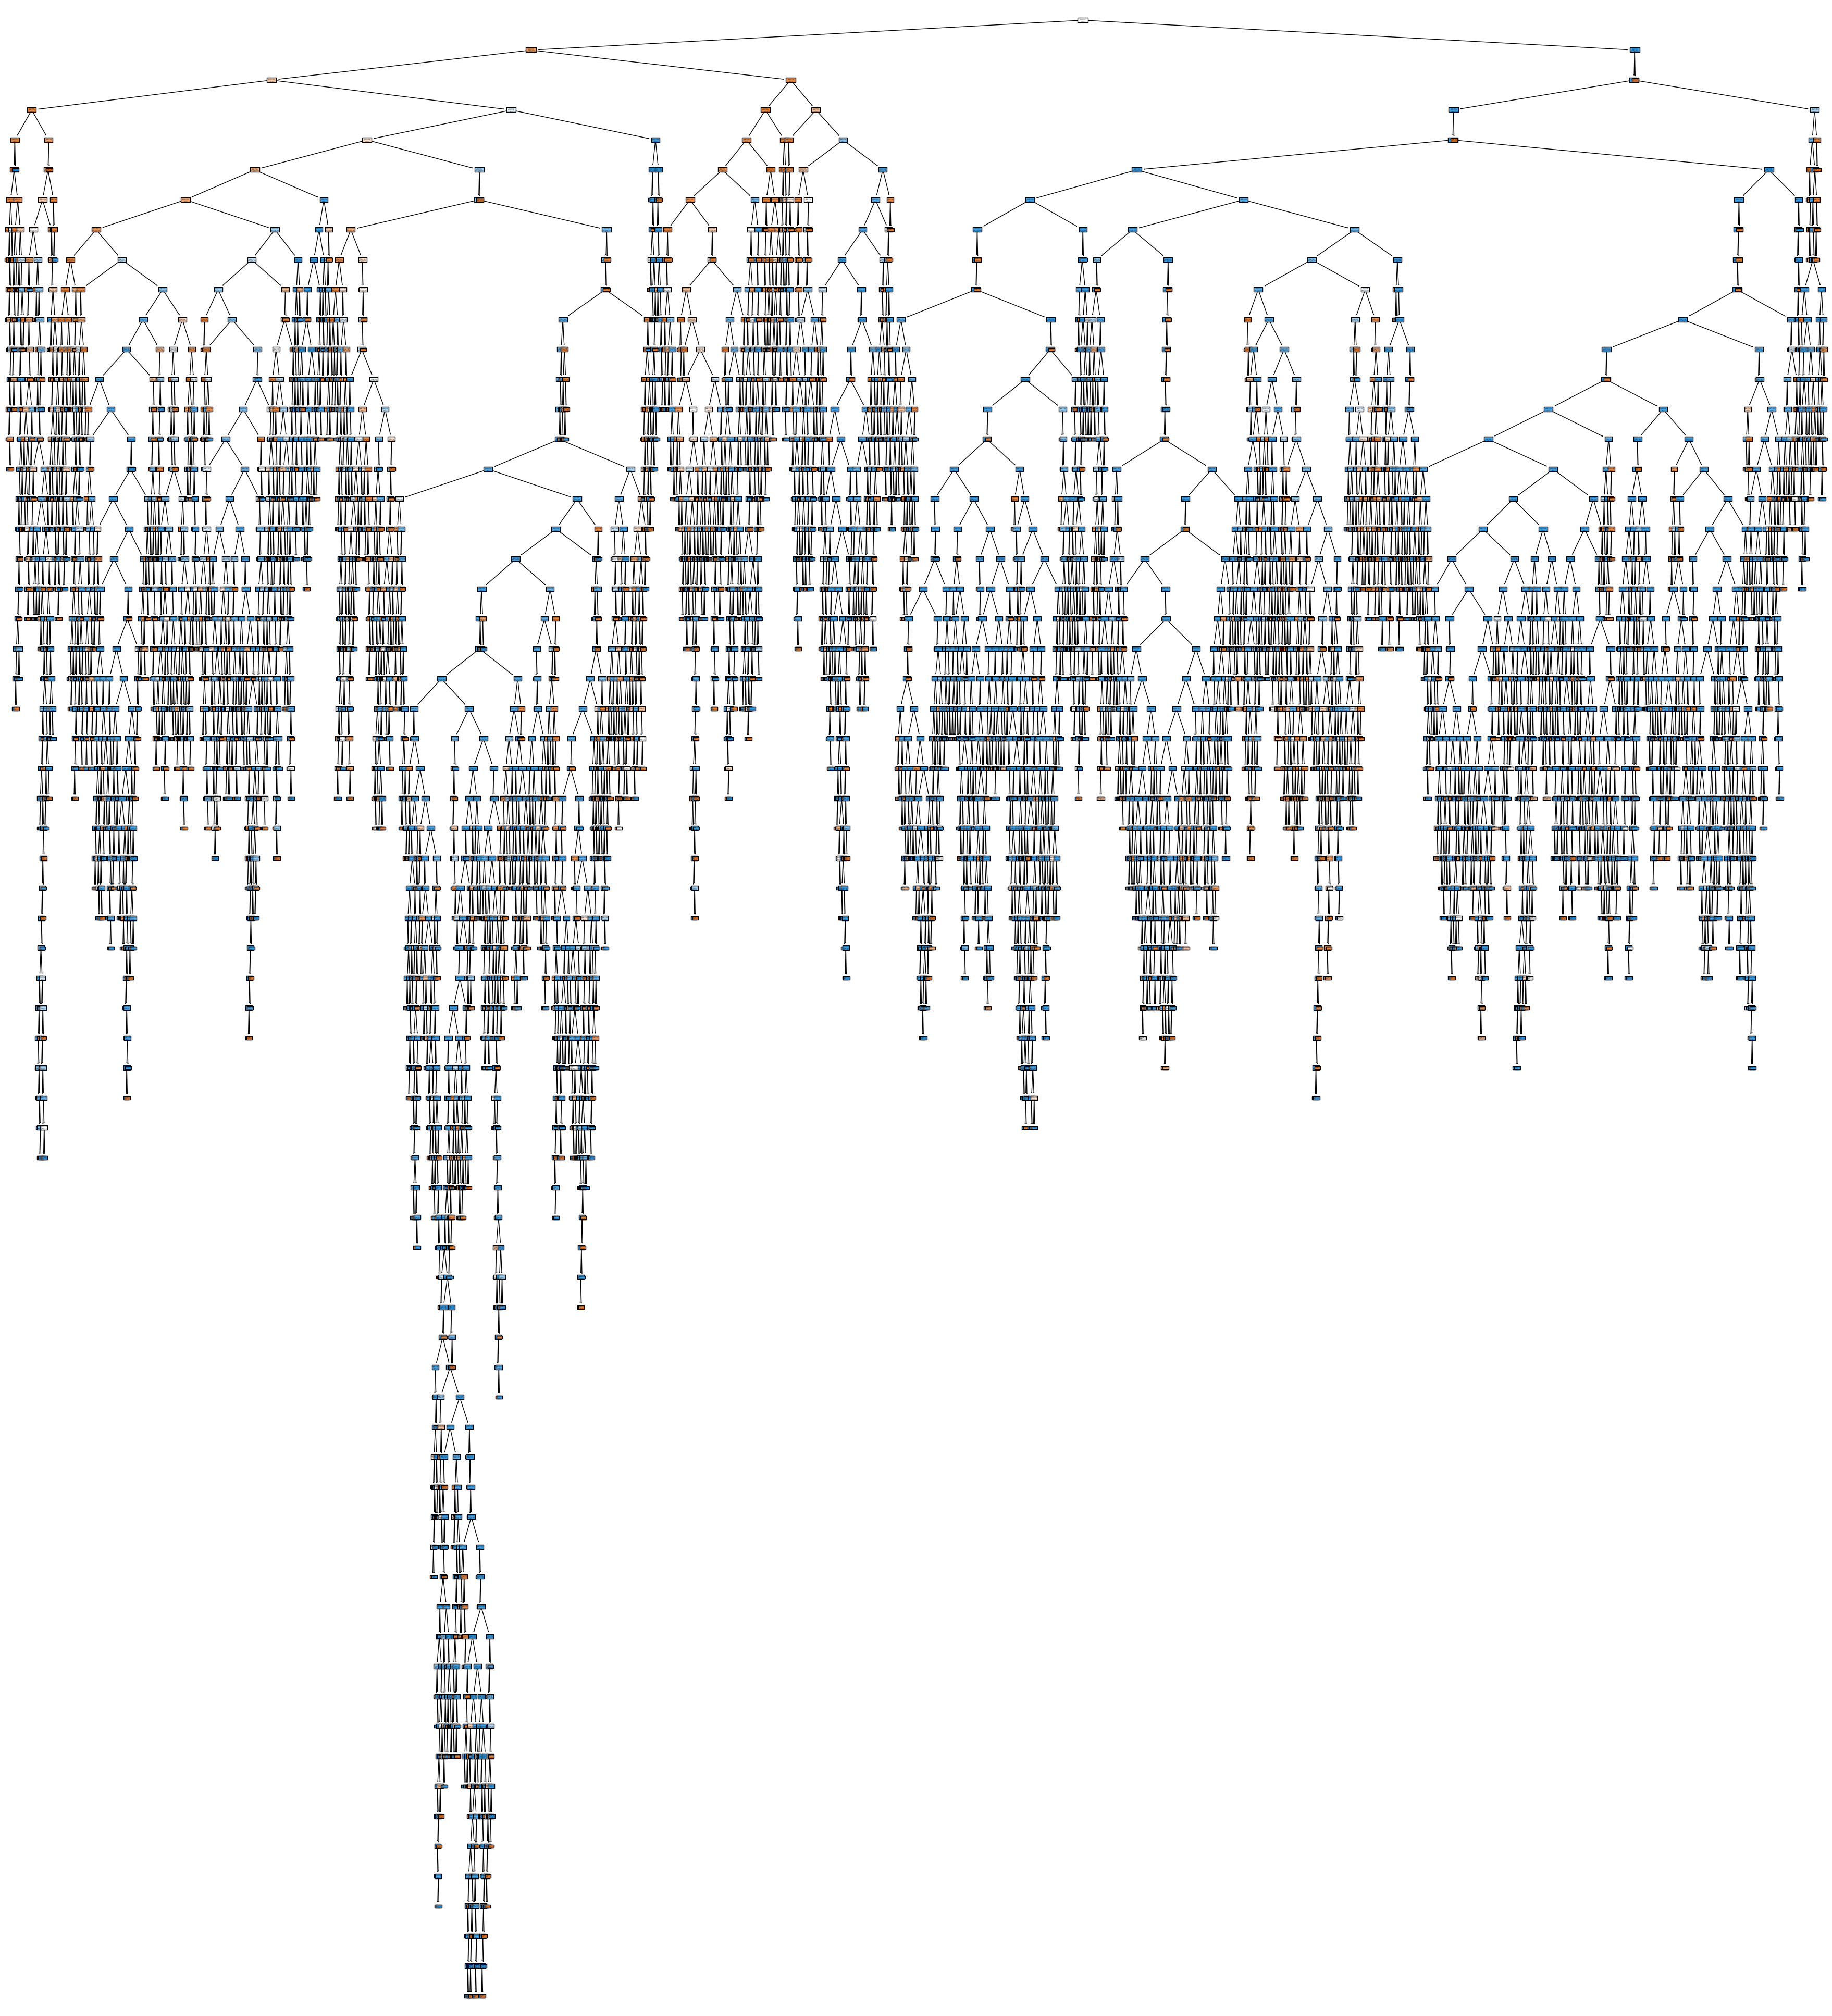

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize']=[45,50]
_=tree.plot_tree(decisiontree,
                #feature_name=x_train,
                class_names=['0','1'],
                filled=True)

In [36]:
train_pred=decisiontree.predict(x_train_os)
test_pred=decisiontree.predict(x_test)

In [37]:
print(classification_report(y_train_os,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442871
           1       1.00      1.00      1.00    442871

    accuracy                           1.00    885742
   macro avg       1.00      1.00      1.00    885742
weighted avg       1.00      1.00      1.00    885742

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.39      0.63      0.48       441

    accuracy                           0.99    111144
   macro avg       0.70      0.81      0.74    111144
weighted avg       1.00      0.99      1.00    111144



In [38]:
des=accuracy_score(y_test,test_pred)
des

0.994700568631685

In [39]:
confusion_matrix(y_test,test_pred)

array([[110278,    425],
       [   164,    277]], dtype=int64)

Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree

### Tune the Hyperparameters using GridSerachCV

In [40]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'criterion': ['entropy'], 
                     'max_depth': [5,6,7,10],  
                     'max_features': ["sqrt", "log2"], 
                     'min_samples_split': [2,5,8,10], 
                     'min_samples_leaf': [1,5,9,11], 
                     'max_leaf_nodes': [5,8,11]}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on x_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train_os, y_train_os)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [41]:
dt_model = DecisionTreeClassifier(criterion ='entropy',
                                  max_depth = 6 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 46)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train, y_train)

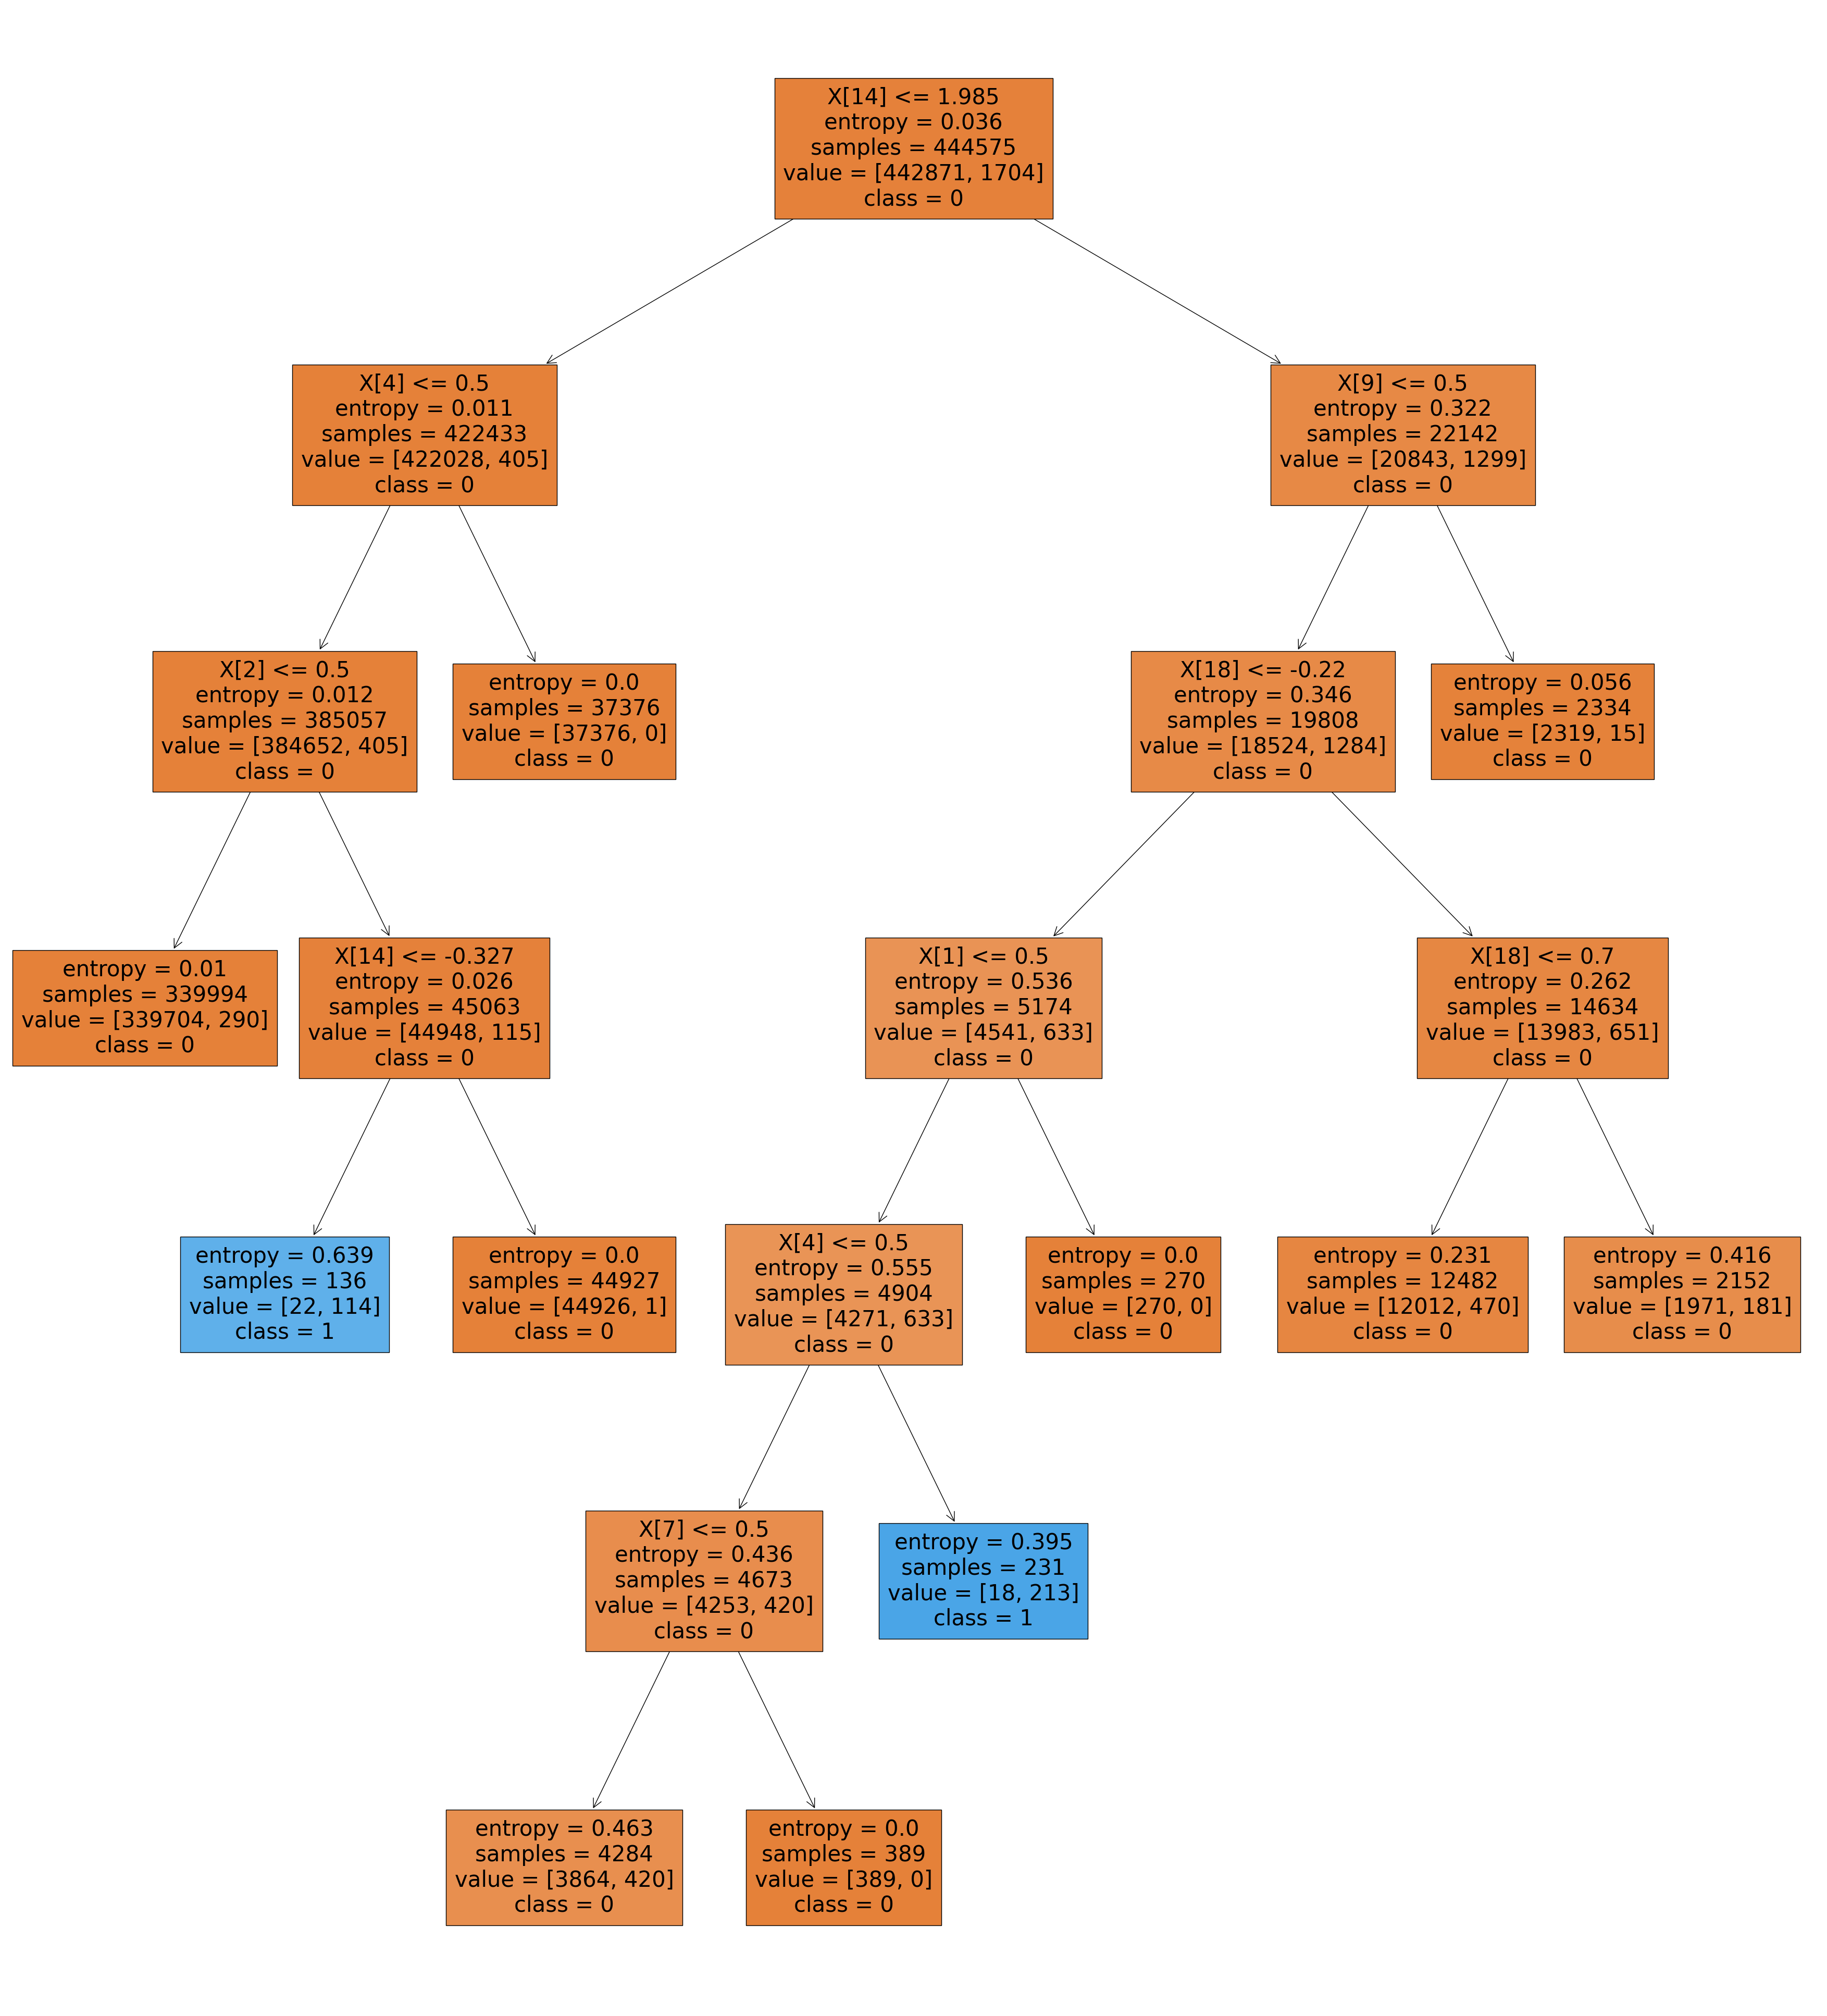

In [42]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize']=[45,50]
_=tree.plot_tree(dt_model,
                
                class_names=['0','1'],
                filled=True)

In [43]:
train_pred=dt_model.predict(x_train_os)
test_pred=dt_model.predict(x_test)

In [44]:
print(classification_report(y_train_os,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71    442871
           1       1.00      0.19      0.32    442871

    accuracy                           0.60    885742
   macro avg       0.78      0.60      0.52    885742
weighted avg       0.78      0.60      0.52    885742

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.90      0.19      0.31       441

    accuracy                           1.00    111144
   macro avg       0.95      0.59      0.65    111144
weighted avg       1.00      1.00      1.00    111144



In [45]:
des1=accuracy_score(y_test,test_pred)
des1

0.99669797739869

In [46]:
confusion_matrix(y_test,test_pred)

array([[110694,      9],
       [   358,     83]], dtype=int64)

## Ada boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,random_state=46)
ada.fit(x_train_os,y_train_os)

AdaBoostClassifier(random_state=46)

In [48]:
test_pred=ada.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    110703
           1       0.04      0.87      0.07       441

    accuracy                           0.91    111144
   macro avg       0.52      0.89      0.51    111144
weighted avg       1.00      0.91      0.95    111144



In [49]:
ada=accuracy_score(y_test,test_pred)
ada

0.9067336068523717

In [50]:
confusion_matrix(y_test,test_pred)

array([[100394,  10309],
       [    57,    384]], dtype=int64)

## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(n_estimators=150,max_depth=10,random_state=46)
gboost.fit(x_train_os,y_train_os)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=46)

In [52]:
test_pred=gboost.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    110703
           1       0.31      0.73      0.43       441

    accuracy                           0.99    111144
   macro avg       0.65      0.86      0.71    111144
weighted avg       1.00      0.99      0.99    111144



In [53]:
gboost=accuracy_score(y_test,test_pred)
gboost

0.9923432663931476

In [54]:
confusion_matrix(y_test,test_pred)

array([[109970,    733],
       [   118,    323]], dtype=int64)

## XGradient Boosting

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
from xgboost import XGBClassifier
xboost=XGBClassifier(max_depth=10,gamma=1)
xboost.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
test_pred=xboost.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.43      0.70      0.54       441

    accuracy                           1.00    111144
   macro avg       0.72      0.85      0.77    111144
weighted avg       1.00      1.00      1.00    111144



In [60]:
xbo=accuracy_score(y_test,test_pred)
xbo

0.9951954221550421

In [61]:
confusion_matrix(y_test,test_pred)

array([[110301,    402],
       [   132,    309]], dtype=int64)

# Hyperparameter Tunning for XGBoost

In [62]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.4, 'max_depth': 6} 



In [64]:
xgb_grid=XGBClassifier(learning_rate=0.4,max_depth=6,gamma=0)
xgb_grid.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [65]:
test_pred=xgb_grid.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    110703
           1       0.27      0.82      0.40       441

    accuracy                           0.99    111144
   macro avg       0.63      0.90      0.70    111144
weighted avg       1.00      0.99      0.99    111144



In [66]:
xboost=accuracy_score(y_test,test_pred)
xboost

0.9903728496365076

In [67]:
confusion_matrix(y_test,test_pred)

array([[109713,    990],
       [    80,    361]], dtype=int64)

# Conclusion

### 